<a href="https://colab.research.google.com/github/ashaoluayanfe/data-science-and-analytics/blob/main/end_to_end_heart_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Heart Disease Using Machine Learning**
This notebook looks into using various Python-based machine and data science libraries in an attempt to build a machine laearning model capable of predicting whether or not someone has heart disease based on their medical attributes

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation 

## **1. Problem Definition**
In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## **2. Data**
Dataset source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease


## **3. Evaluation**
> If we can reach 85% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project

## **4. Features**
1. age: The person’s age in years
2. sex: The person’s sex (1 = male, 0 = female)
3. cp: chest pain type
  * Value 0: asymptomatic.
  * Value 1: atypical angina.
  * Value 2: non-anginal pain.
  * Value 3: typical angina.
4. trestbps: The person’s resting blood pressure (mm Hg on admission to the hospital)
5. chol: The person’s cholesterol measurement in mg/dl
6. fbs: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
7. restecg: resting electrocardiographic results.
  * Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria.
  * Value 1: normal.
  * Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
8. thalach: The person’s maximum heart rate achieved
9. exang: Exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)
11. slope: the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping
12. ca: The number of major vessels (0–3)
13. thal: A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously
  * Value 1: fixed defect (no blood flow in some part of the heart)
  * Value 2: normal blood flow
  * Value 3: reversible defect (a blood flow is observed but it is not normal)
14. target: Heart disease (1 = no, 0= yes)

## **5. Modelling**

### **5.1 Exploratory Data Analysis**

In [ ]:
# import all the tools we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [ ]:
## Load data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ml_dataset/heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

In [ ]:
# Number of classes in the target 
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

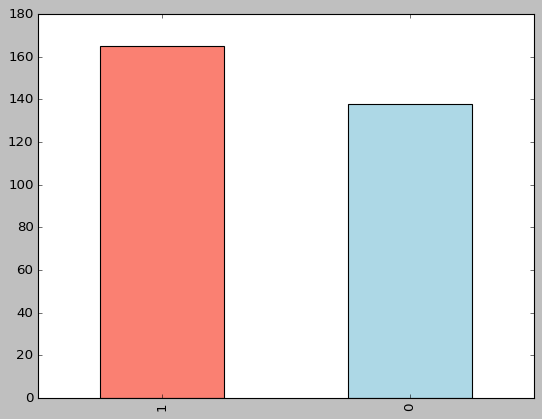

In [ ]:
plt.style.use('classic')
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# Are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
## Heart Disease Frequency According to Sex
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [ ]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


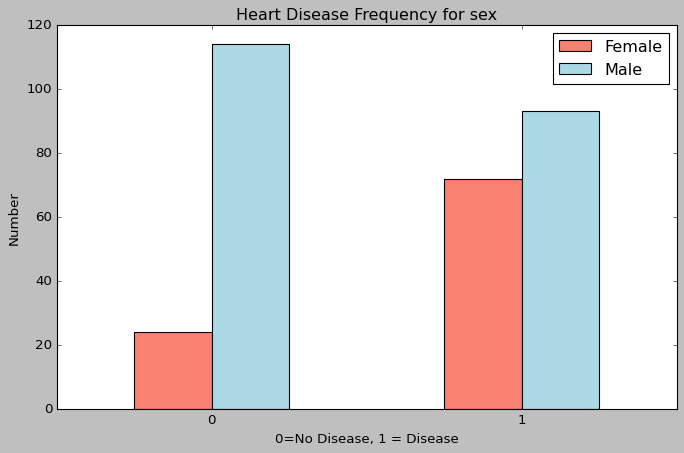

In [ ]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                    figsize=(10, 6),
                                    color=['salmon', 'lightblue'])
plt.title('Heart Disease Frequency for sex')
plt.xlabel('0=No Disease, 1 = Disease')
plt.ylabel('Number')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0);

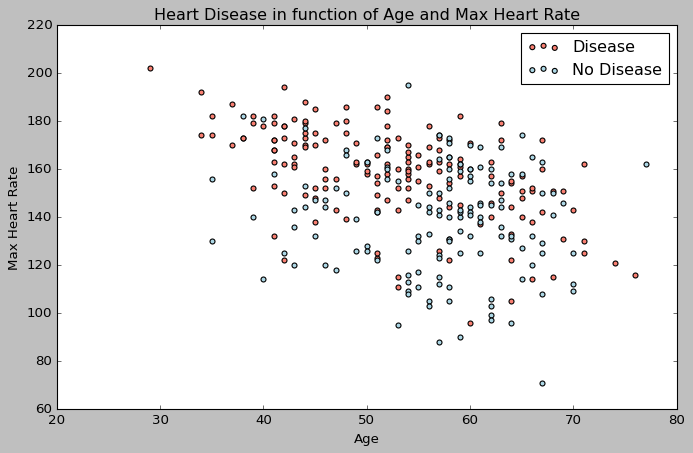

In [ ]:
## Age vs Heart Rate for Heart Disease
plt.figure(figsize=(10,6))

# Scatter with positive exercise
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='salmon')
# scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='lightblue')
# Add some helpful info
plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt. ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease']);

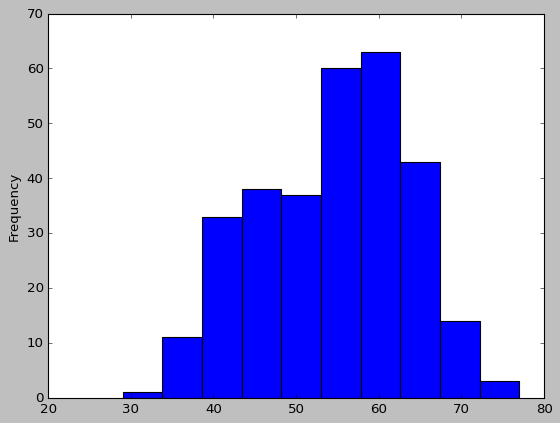

In [ ]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

In [ ]:
## Heart Disease Frequency per chest pain type
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


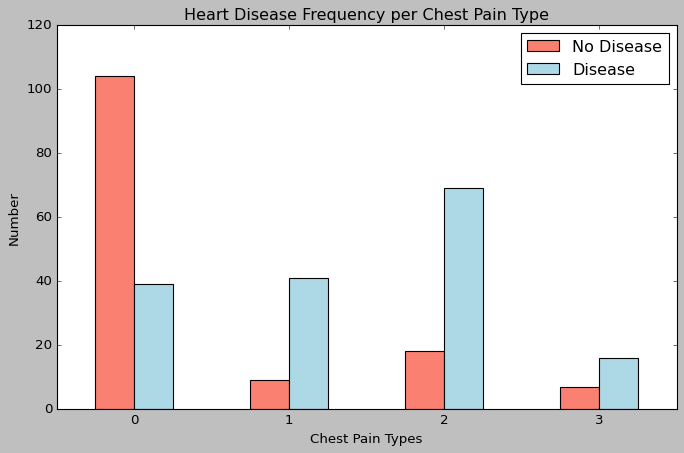

In [ ]:
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                   figsize=(10,6),
                                   color=['salmon', 'lightblue'])

plt.title('Heart Disease Frequency per Chest Pain Type')
plt.xlabel('Chest Pain Types')
plt.ylabel('Number')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0);

### **5.2 Correlation Matrix** 

In [ ]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


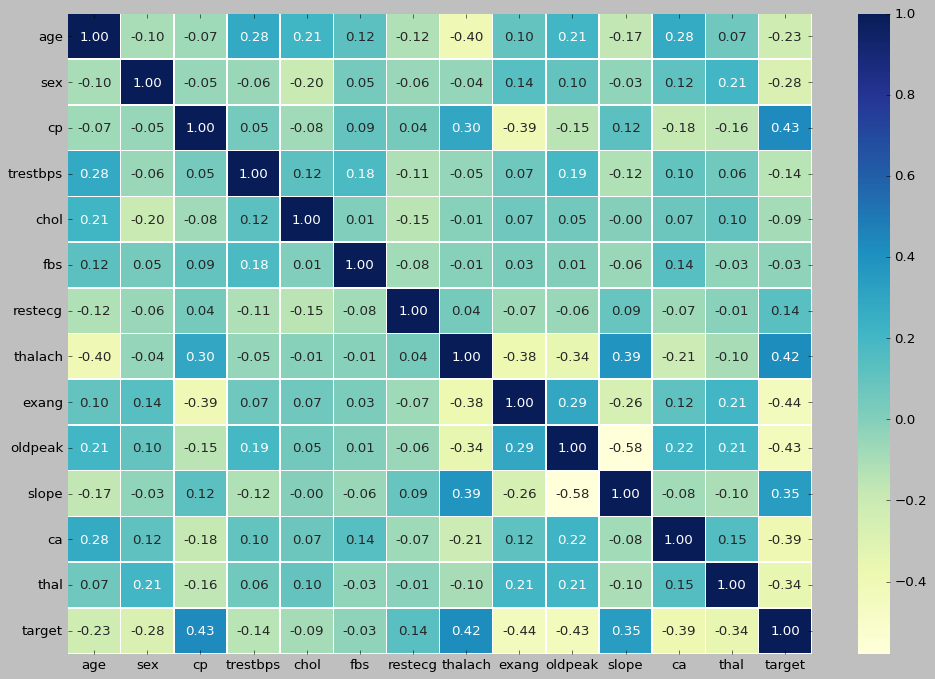

In [ ]:
## Visualizing correlation matrix using seaborn heatmap
corr_matrix= df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax= sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f',
                cmap='YlGnBu')

### **5.3 Preparing Data for Machine Learning**

In [ ]:
# Split data into X and Y
X= df.drop('target', axis = 1)
y= df['target']

In [ ]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
y.head(3)

0    1
1    1
2    1
Name: target, dtype: int64

In [ ]:
# Split data into train and test sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size = 0.2)

### **5.4 Building a Machine Learning Model**
* Four models will be used:
  1. Logistic regression
  2. K-Nearest Neighbours classifier
  3. Random Forest Classifier
  4. Support Vector Machine

In [ ]:
# Put models in a dictionary
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier(),
          'SVM' : SVC(kernel='linear')}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
  '''''
  Fits and evaluates given machine learning models.
  models: a dict of different Scikit-Learn machine learning models
  X_train_norm: Normalized training data(no labels)
  X_test_norm: Normalized test data(no labels)
  y_train: training labels
  y_test: test labels
  '''''

  # set random seed
  np.random.seed(42)

  # Make a dictionary to keep update scores
  model_scores = {}
  #Loop through models
  for name, model in models.items():
    #Fit the model to the data
    model.fit(X_train, y_train)
    # Evaluate the model and append its score to model_scores
    model_scores[name]= model.score(X_test, y_test)
  return model_scores

In [ ]:
model_scores = fit_and_score(models=models, 
                             X_train=X_train,
                             X_test= X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918,
 'SVM': 0.8688524590163934}

### **5.6 Evaluating Machine Learning Model**
The following metrics will be used:     
* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

In [ ]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
Accuracy = clf.score(X_test, y_test)

In [ ]:
Accuracy

0.8688524590163934

#### **5.6.1 ROC curve and AUC**



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


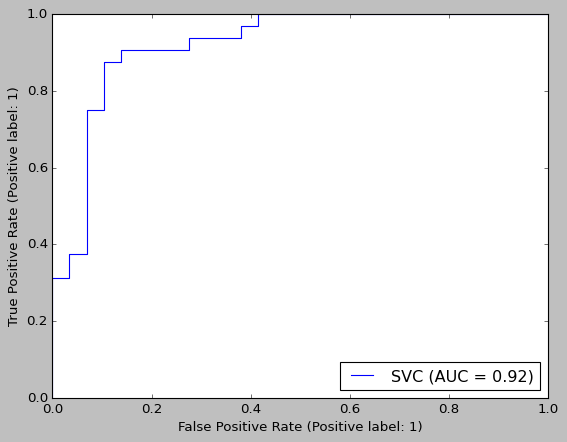

In [ ]:
# Import ROC curve and calculate AUC metric
plot_roc_curve(clf, X_test, y_test);

#### **5.6.2 Confusion Matrix**

In [ ]:
predictions = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

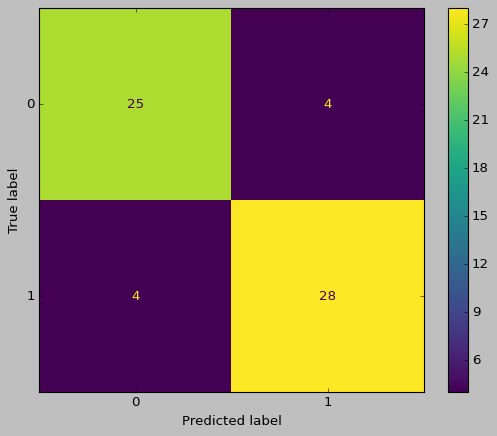

In [ ]:
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=clf.classes_)
disp.plot()
plt.show()

#### **5.6.3 Classification Report**

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



#### **5.6.4 Evaluation Metrics Using Cross-Validation**
* Accuracy
* Precision
* Recall
* F1-score

In [ ]:
# Cross-validated accuracy
cv_acc= cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='accuracy')

In [ ]:
cv_acc= np.mean(cv_acc)
cv_acc

0.8283060109289618

In [ ]:
# Cross-validated precision
cv_precision= cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='precision')
cv_precision= np.mean(cv_precision)

In [ ]:
cv_precision

0.8141444108337147

In [ ]:
# Cross-validated recall
cv_recall= cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.890909090909091

In [ ]:
# Cross-validated f1-score
cv_f1= cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8494781976885468

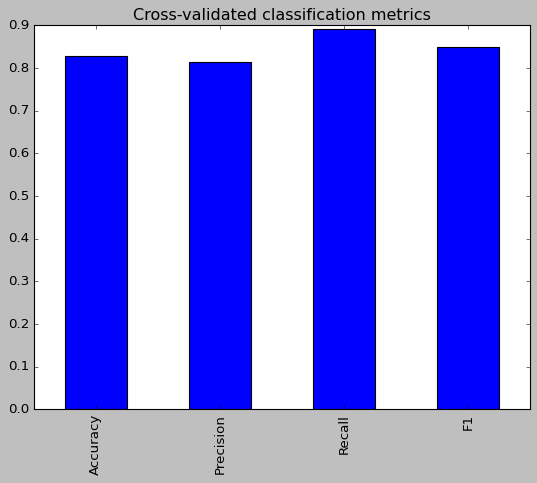

In [ ]:
# Visualise cross-validated metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                           'Precision': cv_precision,
                           'Recall':cv_recall,
                           'F1':cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title = 'Cross-validated classification metrics',
                      legend=False)

### **5.7 Feature Importance**

In [ ]:
# Check coef_
clf.coef_

array([[ 0.00609556, -0.99254634,  0.61699588, -0.0170269 , -0.00190245,
         0.43019654,  0.18124373,  0.01232462, -0.59604274, -0.50634219,
         0.4924634 , -0.59762528, -0.88652235]])

In [ ]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.006095555356665727,
 'ca': -0.5976252777338296,
 'chol': -0.0019024490492256518,
 'cp': 0.6169958820673256,
 'exang': -0.5960427353058027,
 'fbs': 0.43019654498952997,
 'oldpeak': -0.5063421904959879,
 'restecg': 0.18124372718408122,
 'sex': -0.9925463426142991,
 'slope': 0.49246339964172225,
 'thal': -0.8865223533403226,
 'thalach': 0.012324623942731705,
 'trestbps': -0.017026898629751486}

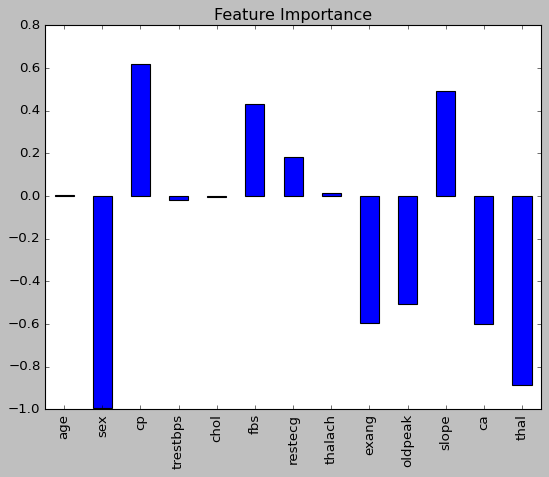

In [ ]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', legend=False)

## 5.8 Making a Prediction

In [ ]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

input_data= np.asarray(input_data)

input_data = input_data.reshape(1,-1)

prediction = clf.predict(input_data)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
import pickle

In [ ]:
filename = 'heart_disease_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('heart_disease_model.sav', 'rb'))